A lighthouse is somewhere off a piece of straight coastline at a position $\alpha$ along the shore and a distance $\beta$ out at sea. It emits a series of short highly collimated flashes at random intervals and hence at random azimuths. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occured, but not the angle from which it came. $N$ flashes have so far been recorded at positions ${x_k}$. Where is the lighthouse?

The likelihood of observing a flash at $x_k$ is
$$ p(x_k | \alpha, \beta) = \frac{\beta}{\pi (\beta^2 +(x_k - \alpha)^2)}. $$

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [67]:
xk = np.array([5.0, 0.0])

def log_prior(theta):
    alpha, beta = theta
    if alpha < -100 or alpha > 100:
        return -np.inf
    if beta < 9.9 or beta > 10.1:
        return -np.inf
    else:
        return 1.0

def log_likelihood(data, theta):
    alpha, beta = theta
    return len(data) * math.log(beta) - np.sum(np.log(np.pi * (beta**2 + (data - alpha)**2)))

In [76]:
from mcmc import Metropolis

x = Metropolis(xk, log_prior, log_likelihood)

x.iterate([1.0, 10.0], 10000, 0, 0.01)

(array([ 159.,  559.,  545.,  562.,  929.,  966.,  669.,  206.,  200.,  206.]),
 array([ 0.42240754,  0.52827374,  0.63413994,  0.74000614,  0.84587234,
         0.95173854,  1.05760474,  1.16347093,  1.26933713,  1.37520333,
         1.48106953]),
 <a list of 10 Patch objects>)

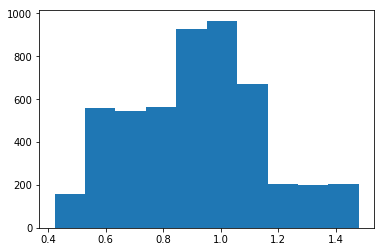

In [77]:
plt.figure()
plt.hist(x.chain[:,0][5000:])

In [79]:
x.chain

array([[  1.        ,  10.        ],
       [  0.99438609,   9.99197075],
       [  0.99433015,   9.97762323],
       ..., 
       [  0.77825824,  10.02628207],
       [  0.79707556,  10.03669683],
       [  0.78455376,  10.04543805]])